SMOTE(Synthetic Minority Over-sampling Technique)
---


In [10]:
%matplotlib inline

In [11]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.1, 0.9], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1, n_samples=100, random_state=10)

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 90, 0: 10})


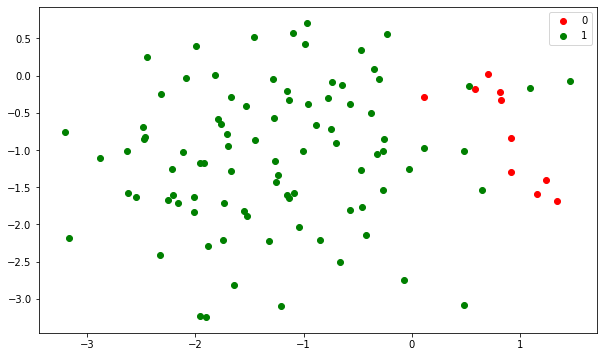

In [33]:
label_c = {0: 'red', 1: 'green'}

plt.figure(figsize=[10, 6])
for label in np.unique(y):
    ind = np.where(y == label)
    plt.scatter(X[ind][:, 0], X[ind][:, 1], c=label_c[label], label=label)
plt.legend()

In [52]:
sm = SMOTE(k_neighbors=3, sampling_strategy=0.2, random_state=11)
X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 90, 0: 18})


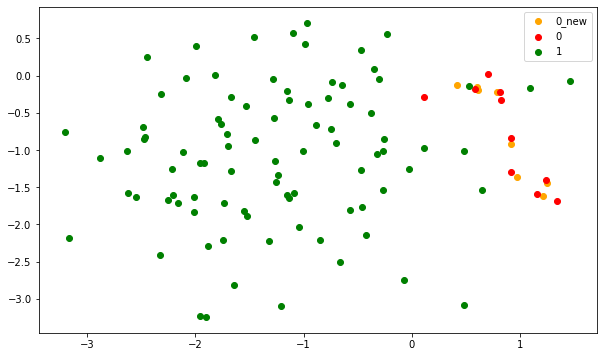

In [53]:
label_c = {0: 'red', 1: 'green'}

plt.figure(figsize=[10, 6])
for label in np.unique(y_res):
    ind = np.where(y_res == label)
    if label == 0:
        plt.scatter(X_res[ind][-8:, 0], X_res[ind][-8:, 1], c='orange', label='0_new')
        plt.scatter(X_res[ind][:-8, 0], X_res[ind][:-8, 1], c=label_c[label], label=label)
    else:
        plt.scatter(X_res[ind][:, 0], X_res[ind][:, 1], c=label_c[label], label=label)
plt.legend()